# UCSD EdX DSE 200 Final project

Dataset: Kaggle's TMDB dataset (https://www.kaggle.com/tmdb/tmdb-movie-metadata)

Research question: Can a movie’s budget predict its revenue?

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [61]:
import scipy.stats

# Importing data

In [2]:
movies_df = pd.read_csv('tmdb_5000_movies.csv')

# Data cleaning and transformation

In [5]:
movies_df.isnull().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
dtype: bool

In [152]:
filtered_df = movies_df.loc[:, ['title', 'release_date', 'budget', 'revenue']]
filtered_df.describe()

,budget,revenue
count,4.803000e+03,4.803000e+03
mean,2.904504e+07,8.226064e+07
std,4.072239e+07,1.628571e+08
min,0.000000e+00,0.000000e+00
25%,7.900000e+05,0.000000e+00
50%,1.500000e+07,1.917000e+07
75%,4.000000e+07,9.291719e+07
max,3.800000e+08,2.787965e+09


In [154]:
trimmed_df.sort_values('budget')

,title,release_date,budget,revenue
4238,Modern Times,1936-02-05,1,8500000
3611,A Farewell to Arms,1932-12-08,4,25
3372,Split Second,1992-05-01,7,5
3419,Bran Nue Dae,2009-08-09,7,7
4608,The Prophecy,1995-09-01,8,16
3131,Of Horses and Men,2013-08-30,10,11
3137,Nurse 3-D,2013-09-28,10,10000000
2933,F.I.S.T.,1978-04-26,11,11
1912,Angela's Ashes,1999-12-25,25,13
1771,The 51st State,2001-12-07,28,14


In [153]:
trimmed_df = filtered_df.query('budget != 0 and revenue != 0')
trimmed_df.describe()

,budget,revenue
count,3.229000e+03,3.229000e+03
mean,4.065444e+07,1.212430e+08
std,4.439674e+07,1.863029e+08
min,1.000000e+00,5.000000e+00
25%,1.050000e+07,1.700000e+07
50%,2.500000e+07,5.518472e+07
75%,5.500000e+07,1.462920e+08
max,3.800000e+08,2.787965e+09


In [30]:
trimmed_df.sort_values('revenue')

,title,release_date,budget,revenue,popularity,vote_average
3372,Split Second,1992-05-01,7,5,4.857028,5.7
3419,Bran Nue Dae,2009-08-09,7,7,0.050456,5.2
3875,Dreaming of Joseph Lees,1999-10-29,2000000,7,0.116150,8.0
2933,F.I.S.T.,1978-04-26,11,11,3.375208,6.4
3131,Of Horses and Men,2013-08-30,10,11,1.617943,6.9
1655,Chasing Liberty,2004-01-09,23000000,12,3.362045,6.1
2485,The Cookout,2004-09-03,16000000,12,0.830596,4.6
1912,Angela's Ashes,1999-12-25,25,13,4.887940,7.0
1771,The 51st State,2001-12-07,28,14,9.670031,5.9
4608,The Prophecy,1995-09-01,8,16,11.818333,6.4


In [156]:
trimmed_df = trimmed_df.query('budget > 250 and revenue > 200')
trimmed_df.describe()

,budget,revenue
count,3.211000e+03,3.211000e+03
mean,4.086303e+07,1.219165e+08
std,4.443047e+07,1.866064e+08
min,7.000000e+03,3.330000e+03
25%,1.100000e+07,1.729907e+07
50%,2.500000e+07,5.598732e+07
75%,5.500000e+07,1.473157e+08
max,3.800000e+08,2.787965e+09


# Visualization: plotting budget vs revenue

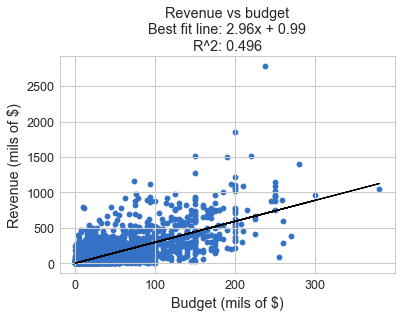

In [69]:
fig, ax = plt.subplots()
budget = trimmed_df['budget'] / 1000000
revenue = trimmed_df['revenue'] / 1000000
slope, intercept, r_value, _, _ = scipy.stats.linregress(budget, revenue)
y_fit = slope * budget + intercept
ax.scatter(budget, revenue)
ax.plot(budget, y_fit, color='black')
title = 'Revenue vs budget\n'
title += 'Best fit line: {}x + {}'.format(round(slope, 2), round(intercept, 2))
title += '\nR^2: {}'.format(round(r_value**2, 3))
ax.set(title=title, xlabel='Budget (mils of $)', ylabel='Revenue (mils of $)')

# Machine learning using linear regression

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [158]:
x_train, x_test, y_train, y_test = train_test_split(budget, revenue, 
                                                    test_size=0.33)

x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
y_train = y_train.values
y_test = y_test.values

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_prediction = regressor.predict(x_test)

rmse = math.sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
rmse

129.86756005664566

# Machine learning using Decision Tree Regressor

In [159]:
dt_regressor = DecisionTreeRegressor(max_depth=20)
dt_regressor.fit(x_train, y_train)

dt_y_prediction = dt_regressor.predict(x_test)
dt_rmse = math.sqrt(mean_squared_error(y_true=y_test, y_pred=dt_y_prediction))
dt_rmse

146.75919329627922